In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
data = pd.read_csv('telecom_customer_churn.csv')

In [102]:
data

,Customer ID,Contract Length,Monthly Charges,Data Usage,Voice Usage,Churn
0,1,24,50,204800,1000,Yes
1,2,12,60,153600,800,No
2,3,36,40,307200,1500,No
3,4,12,70,102400,600,Yes
4,5,24,55,256000,1200,No
5,6,36,65,358400,1800,No
6,7,12,45,153600,500,No
7,8,24,60,204800,1000,Yes
8,9,36,50,307200,1500,No
9,10,12,75,102400,400,Yes


In [110]:
# Convert 'Data Usage' and 'Voice Usage' columns to string
data['Data Usage'] = data['Data Usage'].astype(str)
data['Voice Usage'] = data['Voice Usage'].astype(str)

# Replace 'GB' and 'minutes' in the columns
data['Data Usage'] = data['Data Usage'].str.replace('GB', '').astype(int) * 1024
data['Voice Usage'] = data['Voice Usage'].str.replace('minutes', '').astype(int)

In [111]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [122]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [123]:
y_pred = rf.predict(X_test)

In [124]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
 [[3 0]
 [0 4]]


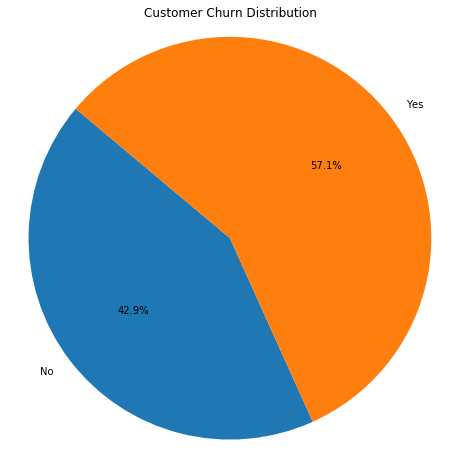

In [125]:
import matplotlib.pyplot as plt

# Data
labels = ['No', 'Yes']
sizes = [3, 4]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Distribution')
plt.axis('equal') 
plt.show()